In [1]:
import sklearn

import numpy as np
import matplotlib.pyplot as plt

# Ridge

## Data

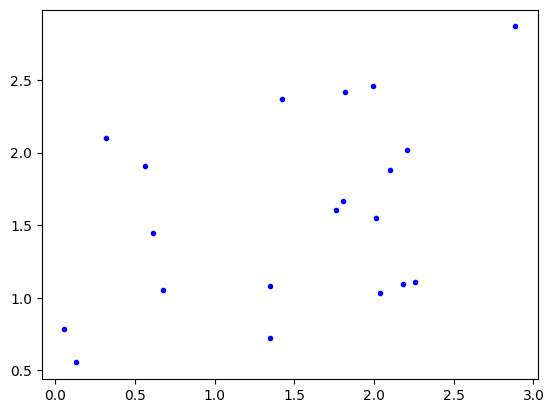

In [2]:
np.random.seed(2024)

m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1)/1.5

plt.plot(X, y, 'b.')
plt.show()


## Ridge model

effects of $\alpha$ 

In [3]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X,y)

ridge_reg.intercept_, ridge_reg.coef_


(array([1.0813671]), array([[0.34186517]]))

In [4]:
ridge_reg = Ridge(alpha=100, solver="cholesky")
ridge_reg.fit(X,y)

ridge_reg.intercept_, ridge_reg.coef_

(array([1.52931051]), array([[0.03857539]]))

How to regularize models using Ridge

In [5]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# ridge for 10th degree polynomial features
alph = 1
ridge_model = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    StandardScaler(),
    Ridge(alpha=alph, solver="cholesky")
)
ridge_model.fit(X, y)

# linear Regression for 10th degree polynomial features
linear_model = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    StandardScaler(),
    LinearRegression()
)
linear_model.fit(X, y)



Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=10, include_bias=False)),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

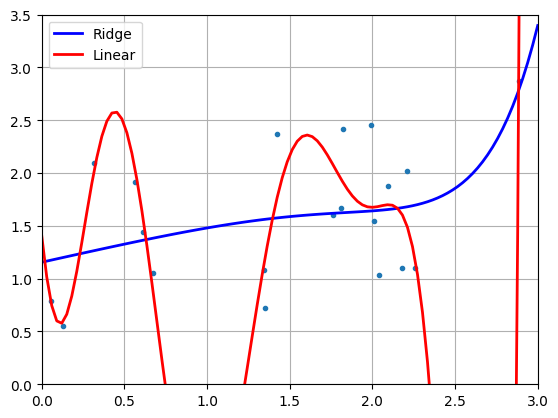

In [6]:
X_new = np.linspace(0, 3, 100).reshape(100,1)
y_new_regul = ridge_model.predict(X_new)
y_new_linear = linear_model.predict(X_new)

plt.plot(X,y, '.')
plt.plot(X_new, y_new_regul, 'b-', linewidth=2, label="Ridge" )
plt.plot(X_new, y_new_linear, 'r-', linewidth=2, label='Linear')
plt.axis([0,3, 0, 3.5])
plt.legend()
plt.grid()
plt.show()


SGDRegressor

In [7]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty='l2', alpha=0.1, 
                       max_iter=1000, eta0=0.01, random_state=42)

sgd_reg.fit(X, y)

sgd_reg.coef_

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.61149348])

In [8]:
sgd_reg.predict([[1.5]])

array([1.47582631])

# LASSO

In [9]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.2)
lasso_reg.fit(X, y)
# lasso_reg.predict([[1.5]])

Lasso(alpha=0.2)

# Elastic Net

In [24]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)

elastic_net.predict([[1.5]])

array([1.59194942])

# Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

params = {'alpha': [0,0.1,0.2,0.4,1,10],
          'l1_ratio': [0, 0.1, 0.5] }
          

gridcv_elastic_model = GridSearchCV(ElasticNet(), params, cv=5)

gridcv_elastic_model.fit(X, y)


In [13]:
gridcv_elastic_model.best_params_

{'alpha': 1, 'l1_ratio': 0}

In [12]:
gridcv_elastic_model.best_estimator_.coef_

array([0.13322072])